In [ ]:
import requests, pandas as pd, numpy as np, datetime as dt, warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
start_date1 = dt.datetime(2021,7,4)

In [ ]:
api_key = '2f0fdd5d49254c06b7dc54cc45a4b628'

In [ ]:
symbol = 'BTC/USD'
interval = '5min'
order = 'asc'

In [ ]:
end_date = start_date1
start_date = end_date - dt.timedelta(days = 1)

In [ ]:
api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [ ]:
data = requests.get(api_url).json()

In [ ]:
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2021-07-03 00:00:00,33796.53906,33888.01172,33796.53906,33806.33984
1,2021-07-03 00:05:00,33745.39844,33753.60938,33692.62109,33703.26953
2,2021-07-03 00:10:00,33700.44922,33702.21094,33646.35156,33658.35938
3,2021-07-03 00:15:00,33698.83984,33698.83984,33645.16016,33687.26172
4,2021-07-03 00:20:00,33675.35156,33675.35156,33649.28906,33649.28906
...,...,...,...,...,...
236,2021-07-03 19:40:00,34687.71875,34697.67969,34670.05078,34682.98047
237,2021-07-03 19:45:00,34685.16016,34691.94141,34651.76172,34691.94141
238,2021-07-03 19:50:00,34695.35938,34769.44922,34695.35938,34769.44922
239,2021-07-03 19:55:00,34762.17188,34764.83984,34743.75000,34747.35938


In [ ]:
n = 4

final_df = pd.DataFrame()

for i in range(n):
    i = n-i-1
    end_date = start_date1 - dt.timedelta(days = 15*i)
    start_date = end_date - dt.timedelta(days = 15)

    api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'
    data = requests.get(api_url).json()
    data_final = pd.DataFrame(data['values'])
    final_df = pd.concat([final_df, data_final[:-1]], ignore_index=True)

In [ ]:
from talib import abstract

integer = abstract.CDLENGULFING(final_df)
final_df['Engulfing'] = integer

In [ ]:
final_df[final_df['Engulfing'] < 0]

,datetime,open,high,low,close,Engulfing
63,2021-05-05 09:25:00,55279.82812,55305.96094,55116.60938,55116.60938,-100
92,2021-05-05 11:50:00,55243.37109,55250.00000,55047.23047,55098.96094,-100
116,2021-05-05 13:50:00,56215.60156,56215.60156,56123.53125,56123.53125,-100
118,2021-05-05 14:00:00,56252.76953,56252.76953,56050.87109,56050.87109,-100
121,2021-05-05 14:15:00,56067.17969,56067.17969,55753.51172,55753.51172,-100
...,...,...,...,...,...,...
17065,2021-07-03 10:45:00,34692.89062,34692.89062,34615.00000,34615.00000,-100
17071,2021-07-03 11:15:00,34608.80078,34608.80078,34501.71875,34501.71875,-100
17112,2021-07-03 14:40:00,34696.78125,34696.78125,34652.78906,34652.78906,-100
17122,2021-07-03 15:30:00,34634.92188,34634.92188,34576.39844,34592.23828,-100


In [ ]:
amount = 1000
core_trade_amount = 0.8*amount
core_quantity = 0
trade_amount = 0.2*amount
core_to_trade = True

portfolio = 0
investment, real_time_portfolio_value, closes, highs, lows, opens = [], [], [], [], [], []
money_end = amount

In [ ]:
# Buying and Selling functions

def buy(allocated_money, price):
    global portfolio, money_end
    quantity = allocated_money/price
    money_end -= quantity*price
    portfolio += quantity
    if investment == []:
        investment.append(allocated_money)
    else:
        investment.append(allocated_money)
        investment[-1] += investment[-2]

def sell(allocated_money, price):
    global money_end, portfolio
    quantity = allocated_money / price
    money_end += allocated_money
    portfolio -= quantity
    investment.append(-allocated_money)
    investment[-1] += investment[-2]

In [ ]:
final_df['close'] = pd.to_numeric(final_df['close'], errors='coerce')

In [ ]:
if core_to_trade:
    buy(core_trade_amount,final_df['close'][0])
    core_quantity += core_trade_amount/final_df['close'][0]
    core_to_trade = False

for i in range(final_df.shape[0]):
    last_eng = final_df['Engulfing'][i]
    amt = last_eng * trade_amount/100
    last_price = final_df['close'][i]
    port_value = (portfolio - core_quantity)*last_price
    trade_amt = amt - port_value
    if last_eng == 0:
        trade_amt =0
    else:
        trade_amt = trade_amt
    RT_portfolio_value = money_end + portfolio*last_price
    final_df['rt_port_value'][i] += RT_portfolio_value

    if trade_amt >= 0:
        buy(trade_amt, last_price)
    else:
        sell(-trade_amt,last_price)

In [ ]:
final_df

,datetime,open,high,low,close,Engulfing,rt_port_value
0,2021-05-05 03:00:00,55119.05078,55119.05078,55119.05078,55119.05078,0,1000
1,2021-05-05 04:10:00,54909.96094,54909.96094,54909.96094,54909.96094,0,996
2,2021-05-05 04:20:00,54830.21094,54830.21094,54830.21094,54830.21094,0,995
3,2021-05-05 04:25:00,54746.60156,54786.87891,54746.60156,54786.87891,0,995
4,2021-05-05 04:30:00,54821.94141,55249.98828,54821.94141,55249.98828,0,1001
...,...,...,...,...,...,...,...
17171,2021-07-03 19:35:00,34660.00000,34689.69922,34647.46094,34674.85938,0,434
17172,2021-07-03 19:40:00,34687.71875,34697.67969,34670.05078,34682.98047,0,434
17173,2021-07-03 19:45:00,34685.16016,34691.94141,34651.76172,34691.94141,0,434
17174,2021-07-03 19:50:00,34695.35938,34769.44922,34695.35938,34769.44922,0,436


In [ ]:
import matplotlib.pyplot as plt

back = pd.read_csv('test_.csv')

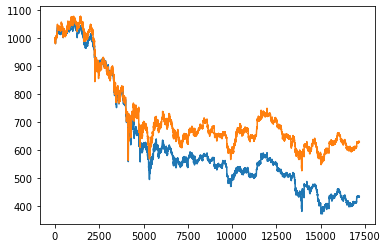

In [ ]:
plt.plot(back['rt_port_value'])
plt.plot(back['Bitcoin'])
plt.show()

In [ ]:
bot_ret = np.mean(np.log(final_df['rt_port_value']/final_df['rt_port_value'].shift(1)))
btc_ret = np.mean(np.log(final_df['close']/final_df['close'].shift(1)))

In [ ]:
bot_std = np.std(np.log(final_df['rt_port_value']/final_df['rt_port_value'].shift(1)))
btc_std = np.std(np.log(final_df['close']/final_df['close'].shift(1)))

In [ ]:
sharpe_bot = bot_ret / bot_std
sharpe_bot

-0.011991890344845806

In [ ]:
sharpe_btc = btc_ret / btc_std
sharpe_btc

-0.0067180151630266876

In [ ]:
daily_bot_av_ret = ((1+bot_ret)**(288) - 1)*100
daily_bot_av_ret

-1.3861671684434307

In [ ]:
daily_btc_av_ret = ((1+btc_ret)**(288) - 1)*100
daily_btc_av_ret

-0.7707126562372602

In [ ]:
excess_daily_av_ret = daily_bot_av_ret - daily_btc_av_ret

In [ ]:
excess_daily_av_ret

-0.6154545122061705

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

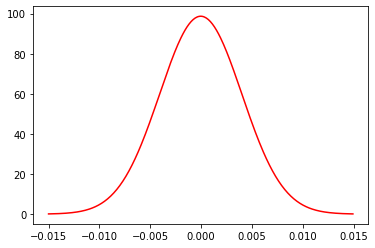

In [ ]:
x = np.arange(-0.015,0.015,0.0001)
norm_dist = norm.pdf(x, bot_ret, bot_std)

plt.plot(x, norm_dist, color ='r')
plt.show()

In [ ]:
confidence_interval = 0.05

var = norm.ppf(confidence_interval, bot_ret, bot_std)
var*100

-0.6696294095343175

In [ ]:
n = 288

var_day = var * np.sqrt(n)
var_day*100

-11.363987912727831

In [ ]:
count = final_df.shape[0]

lower = bot_ret - 2*bot_std / np.sqrt(count)
upper = bot_ret + 2*bot_std / np.sqrt(count)

In [ ]:
lower

-0.0001101430819239184

In [ ]:
upper

1.3210418413766515e-05